# load csv file

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.use('nBagg')
import os
os.chdir('F:\internship')
import pandas as pd

In [2]:
A=pd.read_csv('zomato.csv')
data=pd.DataFrame(A)
data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


# Data Preprocessing and EDA

as we no need of adrdress,phone,url column because it indicates no value or gives same information for modelling we look for location only

In [3]:
data.shape

(51717, 17)

In [4]:
drop_col=['url','phone','address', 'listed_in(city)']
data.drop(drop_col,axis=1,inplace=True)

In [5]:
data.duplicated().sum()

9809

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            51707, 51708, 51709, 51710, 51711, 51712, 51713, 51714, 51715,
            51716],
           dtype='int64', length=41908)

Changing columns name as per our convinence

In [245]:
data=data.rename(columns={'cost(two)':'cost','listed_in(type)':'listed_type'})
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,listed_type
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800.0,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800.0,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800.0,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,masala dosa,"South Indian, North Indian",300.0,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"panipuri, gol gappe","North Indian, Rajasthani",600.0,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,0,0,3.7,34,Whitefield,"Casual Dining, Bar","rice, fish, chicken","North Indian, Continental",800.0,"[(Rated 4.0, RATED\n Ambience- Big and spacio...",[],Pubs and bars
51711,Bhagini,0,0,2.5,81,Whitefield,"Casual Dining, Bar","biryani, andhra meal","Andhra, South Indian, Chinese, North Indian",800.0,"[(Rated 4.0, RATED\n A fine place to chill af...",[],Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,27,Whitefield,Bar,"cocktails, decor, chicken, mocktails",Continental,1500.0,"[(Rated 5.0, RATED\n Food and service are inc...",[],Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,236,"ITPL Main Road, Whitefield",Bar,"cocktails, pizza, buttermilk",Finger Food,2500.0,"[(Rated 4.0, RATED\n Nice and friendly place ...",[],Pubs and bars


In [13]:
data.votes.describe()

count    41908.000000
mean       337.898229
std        881.404533
min          0.000000
25%         11.000000
50%         59.000000
75%        255.000000
max      16832.000000
Name: votes, dtype: float64

there are some restaurent with 0 votes too good insights is it!
and there is a restaurent with 16832 votes too

In [14]:
print(data.shape)
data.isnull().sum()

(41908, 13)


name                0
online_order        0
book_table          0
rate             4252
votes               0
location           14
rest_type         172
dish_liked      20206
cuisines           36
cost(2)           253
reviews_list        0
menu_item           0
listed_type         0
dtype: int64

In [15]:
data['rate'].dtype

dtype('O')

In [16]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [17]:
data['rate']=data['rate'].replace('NEW',np.NaN)
data['rate']=data['rate'].replace('-',np.NaN)
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [18]:
data.rate=data.rate.astype(str)
data.rate=data.rate.apply(lambda x : x.replace('/5',''))
data.rate=data.rate.astype(float)

we can see the rate column is in str type which is non supported type for ML training so we change into float as per the rating method  and need to convert all catogorical column into numerical we will do at time of modelling after visualization for insights

 so we replaced incorrect value and symbols in rate with NaN value using Replace method

In [19]:
data['rate'].dtype

dtype('float64')

In [20]:
data['cuisines'].isna().sum()

36

In [21]:
data.rest_type.value_counts()

Quick Bites                   14611
Casual Dining                  9068
Cafe                           3143
Delivery                       1966
Dessert Parlor                 1868
                              ...  
Sweet Shop, Dessert Parlor        1
Dessert Parlor, Food Court        1
Bakery, Sweet Shop                1
Pop Up                            1
Mess, Quick Bites                 1
Name: rest_type, Length: 93, dtype: int64

In [22]:
data['rest_type'].isnull().sum()

172

In [23]:
data['rest_type'].fillna(value="Quick Bites",inplace=True)

replacing missing values with most occuring value  in rest_type

In [24]:
data['cuisines'].value_counts()

North Indian                                   2305
North Indian, Chinese                          1893
South Indian                                   1350
Bakery, Desserts                                698
Biryani                                         654
                                               ... 
North Indian, Chettinad, Chinese                  1
Desserts, Drinks Only                             1
North Indian, South Indian, Kerala, Chinese       1
Hyderabadi, Andhra, Chinese, Biryani              1
Mithai, Gujarati                                  1
Name: cuisines, Length: 2723, dtype: int64

In [184]:
data['cuisines'].fillna('North Indian'or 'North Indian ,Chinese' or 'South Indian' ,inplace =True)

replacing missing values with most occuring value  in cuisines

In [25]:
data.isna().sum()

name                0
online_order        0
book_table          0
rate             5914
votes               0
location           14
rest_type           0
dish_liked      20206
cuisines           36
cost(2)           253
reviews_list        0
menu_item           0
listed_type         0
dtype: int64

lets reduce the null values of remaining features using replacing means of others or dropping minimal values

In [26]:
data['reviews_list'].dtype

dtype('O')

In [27]:
data.reviews_list.values[:1]

array(['[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said th

In [30]:
#we could extract these values from reviews and take their mean to fill rate column
data.reviews_list.values[1]

'[(\'Rated 4.0\', \'RATED\\n  Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.\'), (\'Rated 3.0\', \'RATED\\n  The ambience is really nice, staff is courteous. The price is pretty high for the quantity, but overall the experience was fine. The quality of food is nice but nothing extraordinary. They also have buffet(only veg)\'), (\'Rated 3.0\', \'RATED\\n  I felt good is little expensive for the quantity they serve and In terms of taste is decent. There is nothing much to talk about the ambience, regular casual dining restaurant where you can take your family for dinner or lunch. If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers.\'), (\'Rated 4.0\', \'RATED

In [28]:
type(data.reviews_list[1])

str

In [29]:
import ast
ast.literal_eval(data.reviews_list.values[1])

[('Rated 4.0',
  'RATED\n  Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.'),
 ('Rated 3.0',
  'RATED\n  The ambience is really nice, staff is courteous. The price is pretty high for the quantity, but overall the experience was fine. The quality of food is nice but nothing extraordinary. They also have buffet(only veg)'),
 ('Rated 3.0',
  'RATED\n  I felt good is little expensive for the quantity they serve and In terms of taste is decent. There is nothing much to talk about the ambience, regular casual dining restaurant where you can take your family for dinner or lunch. If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers.'),
 ('Rated 4.0',
  'RATED\n  I wa

In [30]:
%time data.reviews_list=data.reviews_list.apply(lambda x: ast.literal_eval(x))

Wall time: 1min 13s


In [31]:
type(data.reviews_list[100])

list

In [32]:
data.reviews_list[0][0][0].split()[0]

'Rated'

In [33]:
data['reviews_list'].values[1]

[('Rated 4.0',
  'RATED\n  Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is good. Prices are affordable. Will recommend this restaurant for early dinner. The place is little noisy.'),
 ('Rated 3.0',
  'RATED\n  The ambience is really nice, staff is courteous. The price is pretty high for the quantity, but overall the experience was fine. The quality of food is nice but nothing extraordinary. They also have buffet(only veg)'),
 ('Rated 3.0',
  'RATED\n  I felt good is little expensive for the quantity they serve and In terms of taste is decent. There is nothing much to talk about the ambience, regular casual dining restaurant where you can take your family for dinner or lunch. If they improve on that quantity or may be reduce the price a bit or may be improve the presentation of the food it might Manage to get more repeat customers.'),
 ('Rated 4.0',
  'RATED\n  I wa

In [34]:
def extract_from_review_list(x):
    #extract the rate value out of a string inside tuple
    # ensure that x is not Null and there is more than one rate
    if not x or len(x) <= 1:
        return None
    rate_new= [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]
    return round((sum(rate_new)/len(rate_new)),1)

In [35]:
%time data['rate_new']=data.reviews_list.apply(lambda x: extract_from_review_list(x))

Wall time: 2.41 s


In [36]:
data.loc[:,['rate','rate_new']].sample(10)

,rate,rate_new
7887,4.8,4.4
18413,3.4,5.0
41631,3.6,2.5
35510,3.4,3.5
15339,3.8,4.8
32408,3.7,3.2
8577,4.0,NaN
29271,4.9,4.5
17057,3.6,NaN
51677,2.5,3.0


In [37]:
# apply the changes
nan_index = data.query('rate != rate & rate_new == rate_new').index
for i in nan_index:
    data.loc[i,'rate'] = data.loc[i,'rate_new']

In [38]:
nan_index

Int64Index([   72,    90,   110,   116,   138,   216,   232,   432,   463,
              472,
            ...
            51257, 51382, 51386, 51424, 51445, 51447, 51452, 51487, 51500,
            51586],
           dtype='int64', length=1053)

In [39]:
data.rate.isna().sum()

4861

In [41]:
data.dropna(subset=['rate', 'cost(2)'],inplace=True)

In [42]:
data.drop(['rate_new'],axis=1,inplace=True)

In [83]:
data.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        8
cost(two)       0
reviews_list    0
menu_item       0
listed_type     0
dtype: int64

we finllay reduced to zero of null values mostly column 'rate' is filled with mean of review_list for null values 

1.reduce the biggest null values of dish_liked with extracting foods stated by reviewrs in reviews_last because its nearly half of the rows filled with null if we remove it is hard for good prediction \
2.otherwise fill with most occuring values but it will become bias where null values is huge

In [44]:
data.dish_liked

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51709                                                  NaN
51711                                 Biryani, Andhra Meal
51712                                                  NaN
51715                         Cocktails, Pizza, Buttermilk
51716                                                  NaN
Name: dish_liked, Length: 36840, dtype: object

In [46]:
#converting to lowercase
data.dish_liked=data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [47]:
data.dish_liked.head(10)

0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
2    churros, cannelloni, minestrone soup, hot choc...
3                                          masala dosa
4                                  panipuri, gol gappe
5    onion rings, pasta, kadhai paneer, salads, sal...
6                                                  NaN
7    farmhouse pizza, chocolate banana, virgin moji...
8    pizza, mocktails, coffee, nachos, salad, pasta...
9    waffles, pasta, coleslaw sandwich, choco waffl...
Name: dish_liked, dtype: object

as we can see dishes liked or disliked are mentioned in reviews so if we can extract these dishes we can fill the nan values of dish_liked column
we will start by getting a list of all the dishes available from our dataset

In [48]:
dish_list=[]
for i in list(data.index):
        #print(type(data.dish_liked[i])) #checking whether it shows  index and dish_name type
        if data.dish_liked[i]!='NaN' and isinstance(data.dish_liked[i],str):
            k=data['dish_liked'][i].split(',')
            dish_list.extend(k)
print(dish_list)

['pasta', ' lunch buffet', ' masala papad', ' paneer lajawab', ' tomato shorba', ' dum biryani', ' sweet corn soup', 'momos', ' lunch buffet', ' chocolate nirvana', ' thai green curry', ' paneer tikka', ' dum biryani', ' chicken biryani', 'churros', ' cannelloni', ' minestrone soup', ' hot chocolate', ' pink sauce pasta', ' salsa', ' veg supreme pizza', 'masala dosa', 'panipuri', ' gol gappe', 'onion rings', ' pasta', ' kadhai paneer', ' salads', ' salad', ' roti', ' jeera rice', 'farmhouse pizza', ' chocolate banana', ' virgin mojito', ' pasta', ' paneer tikka', ' lime soda', ' prawn pizza', 'pizza', ' mocktails', ' coffee', ' nachos', ' salad', ' pasta', ' sandwiches', 'waffles', ' pasta', ' coleslaw sandwich', ' choco waffle', ' tacos', ' momos', ' cheese nachos', 'waffles', ' pasta', ' crispy chicken', ' honey chilli chicken', ' sandwich', ' coffee', ' crepe', 'mocktails', ' peri fries', ' lasagne', ' pizza', ' chicken bbq wings', ' virgin mojito', ' nachos', 'coffee', ' spaghetti'

In [49]:
len(dish_list)

118363

In [50]:
dish_list=set(dish_list) #getting unique dishes values

In [51]:
len(dish_list)

3507

In [52]:
p=data.reviews_list[0]
' '.join([i[1].replace('RATED\n ','') for i in p]).replace('\n','').replace('\S+','').replace('?','').replace('Ã','').replace('\\x','').strip().lower()

'a beautiful place to dine in.the interiors take you back to the mughal era. the lightings are just perfect.we went there on the occasion of christmas and so they had only limited items available. but the taste and service was not compromised at all.the only complaint is that the breads could have been better.would surely like to come here again.  i was here for dinner with my family on a weekday. the restaurant was completely empty. ambience is good with some good old hindi music. seating arrangement are good too. we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. food was fresh and good, service is good too. good for family hangout.cheers  its a restaurant near to banashankari bda. me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. on inquiring they said this place is mostly visited by vegetarians. anyways we ordered ala carte items which took ages to come

In [53]:
# clear the text
def clear_text(t):
    '''
    clear the input text t
    '''
    return ' '.join([i[1].replace("RATED\n  ",'') for i in t]).encode('utf8').decode('ascii',errors='replace').\
 replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower()

In [54]:
data['reviews_text'] = data.reviews_list.apply(lambda x: clear_text(x))

In [55]:
dish_list.intersection(data['reviews_text'][100].split())

{'rice', 'thali', 'vegetarian'}

In [56]:
data['dish_liked_new']=data.reviews_text.apply(lambda x: ', '.join(list(dish_list.intersection(x.split()))))

In [57]:
data.dish_liked_new.isna().sum()

0

In [58]:
# get sample to compare
data.query('dish_liked != dish_liked')[['dish_liked','dish_liked_new']].sample(5,random_state=1)

,dish_liked,dish_liked_new
35277,NaN,"shawarma, chicken, fries"
11918,NaN,chicken
44043,NaN,"tikka, biryani, chicken"
3703,NaN,"coffee, tea, roti"
51190,NaN,"vegetarian, chicken, prawn"


In [59]:
nan_index=data.query('dish_liked !=dish_liked & dish_liked_new==dish_liked_new').index

In [60]:
%%time
for i in nan_index:
    data.loc[i,'dish_liked']=data.loc[i,'dish_liked_new'] 

Wall time: 1min 16s


In [61]:
data.drop(['dish_liked_new','reviews_text'],axis=1,inplace=True)

In [84]:
data.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        8
cost(two)       0
reviews_list    0
menu_item       0
listed_type     0
dtype: int64

finally we got them to zero null values let do some binary opertion for simple catogorical values now later we will do encoding

# simple encoding for simple features

In [63]:
data['online_order']=pd.get_dummies(data.online_order,drop_first=True)
data['book_table']=pd.get_dummies(data.book_table,drop_first=True)

In [246]:
data['cost']=data['cost'].astype(str)
data['cost']=data['cost'].apply(lambda v:v.replace(',',''))
data['cost']=data['cost'].astype(float)

In [86]:
data['cost(two)'].dtype
data['votes'].dtype

dtype('int64')

changing type of variables to numerical 

In [247]:
data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,listed_type
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"pasta, lunch buffet, masala papad, paneer laja...","North Indian, Mughlai, Chinese",800.0,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"momos, lunch buffet, chocolate nirvana, thai g...","Chinese, North Indian, Thai",800.0,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","churros, cannelloni, minestrone soup, hot choc...","Cafe, Mexican, Italian",800.0,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,masala dosa,"South Indian, North Indian",300.0,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"panipuri, gol gappe","North Indian, Rajasthani",600.0,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,0,0,3.7,34,Whitefield,"Casual Dining, Bar","rice, fish, chicken","North Indian, Continental",800.0,"[(Rated 4.0, RATED\n Ambience- Big and spacio...",[],Pubs and bars
51711,Bhagini,0,0,2.5,81,Whitefield,"Casual Dining, Bar","biryani, andhra meal","Andhra, South Indian, Chinese, North Indian",800.0,"[(Rated 4.0, RATED\n A fine place to chill af...",[],Pubs and bars
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,27,Whitefield,Bar,"cocktails, decor, chicken, mocktails",Continental,1500.0,"[(Rated 5.0, RATED\n Food and service are inc...",[],Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,236,"ITPL Main Road, Whitefield",Bar,"cocktails, pizza, buttermilk",Finger Food,2500.0,"[(Rated 4.0, RATED\n Nice and friendly place ...",[],Pubs and bars


# INSIGHTS AND VISUALIZATION (using matplotlib,seaborn) OF OUR DATASETS 

In [68]:
data['book_table'].value_counts()

0    30807
1     6033
Name: book_table, dtype: int64

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


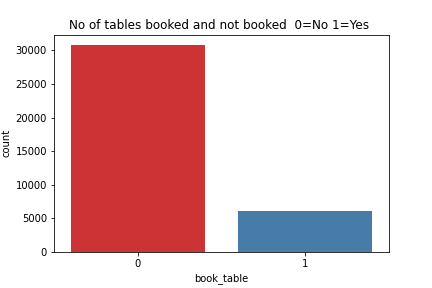

<function matplotlib.pyplot.show(block=None)>

In [69]:
sns.countplot(data.book_table,palette = "Set1")
plt.title('No of tables booked and not booked  0=No 1=Yes ')
plt.show

In [70]:
data['online_order'].value_counts()

1    24977
0    11863
Name: online_order, dtype: int64

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


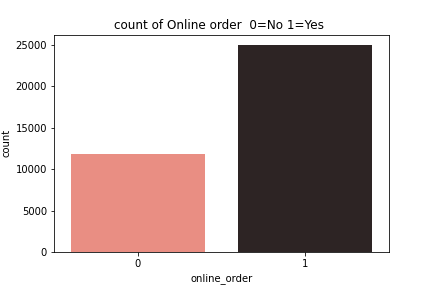

<function matplotlib.pyplot.show(block=None)>

In [382]:
sns.countplot(data.online_order,palette = "dark:salmon_r")
plt.title('count of Online order  0=No 1=Yes ')
plt.show

RESTAURANTS NAME AND ITS COUNTS 

In [72]:
data['name'].value_counts()

Onesta                          85
Cafe Coffee Day                 84
Empire Restaurant               69
Kanti Sweets                    66
Just Bake                       62
                                ..
Eat Eroo - South China           1
New Food Corner Kolkata Mess     1
Grand Taj Durbar                 1
Emerald Green                    1
Havmor - Hav Funn                1
Name: name, Length: 6863, dtype: int64

<IPython.core.display.Javascript object>


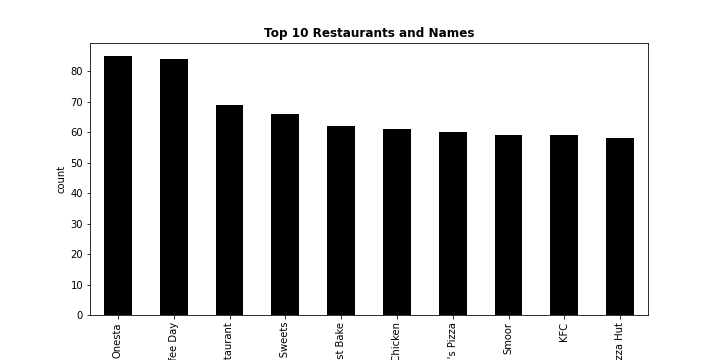

In [73]:
plt.figure(figsize=(10,5))
data.name.value_counts()[:10].plot(kind='bar',color='black')
plt.title("Top 10 Restaurants and Names",weight='bold')
plt.ylabel('count')
plt.show()

INSIGHTS OF LOCATIONS AND RESTAURANTS 

In [116]:
data['location'].value_counts()

BTM                      3161
Koramangala 5th Block    2056
HSR                      1807
Indiranagar              1793
Whitefield               1620
                         ... 
Yelahanka                   4
West Bangalore              4
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

<IPython.core.display.Javascript object>


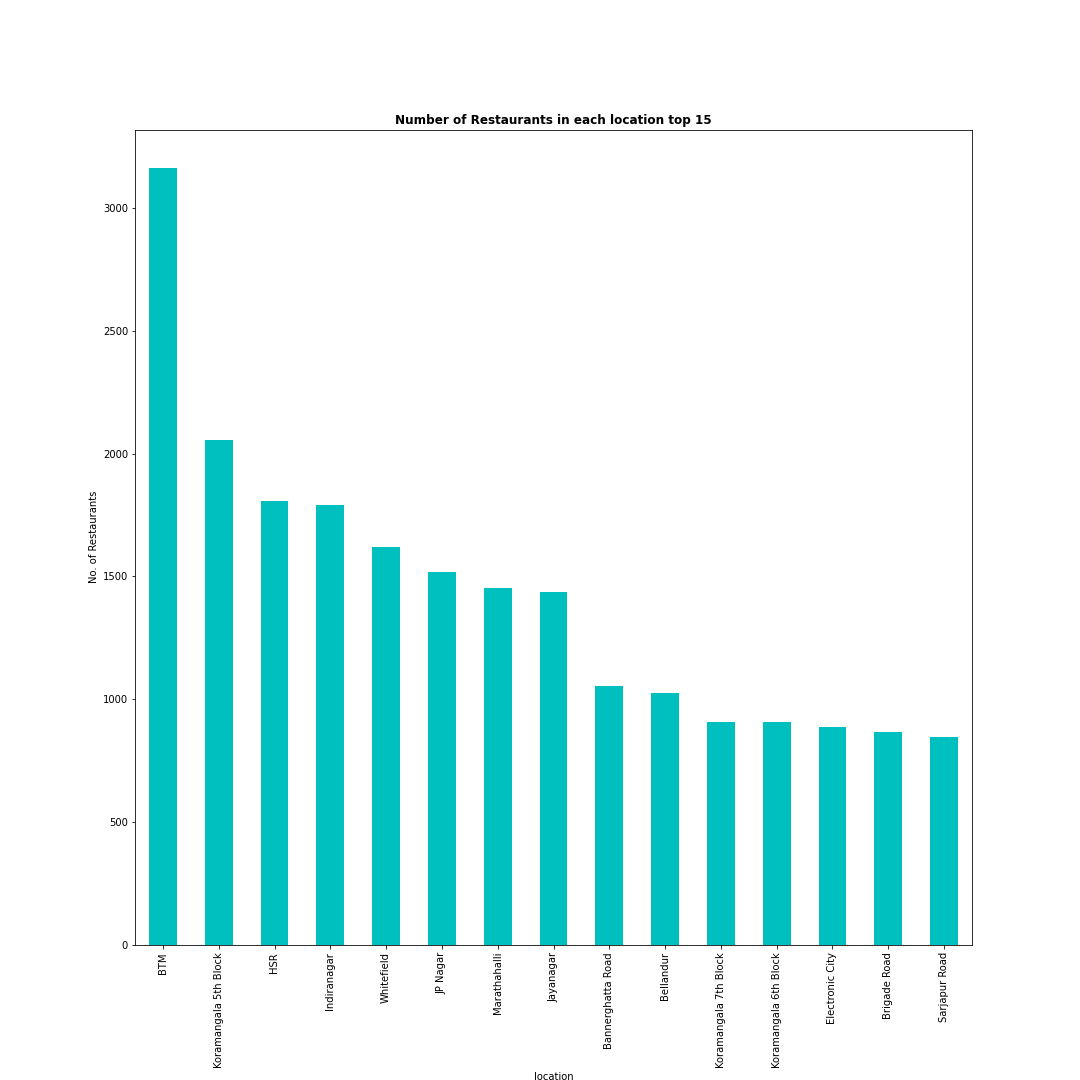

In [131]:
plt.figure(figsize=(15,15))
ax =data.location.value_counts()[:15].plot(kind='bar',color='c')
plt.title('Number of Restaurants in each location top 15', weight='bold',)
plt.xlabel('location')
plt.ylabel('No. of Restaurants')
plt.show()

<IPython.core.display.Javascript object>


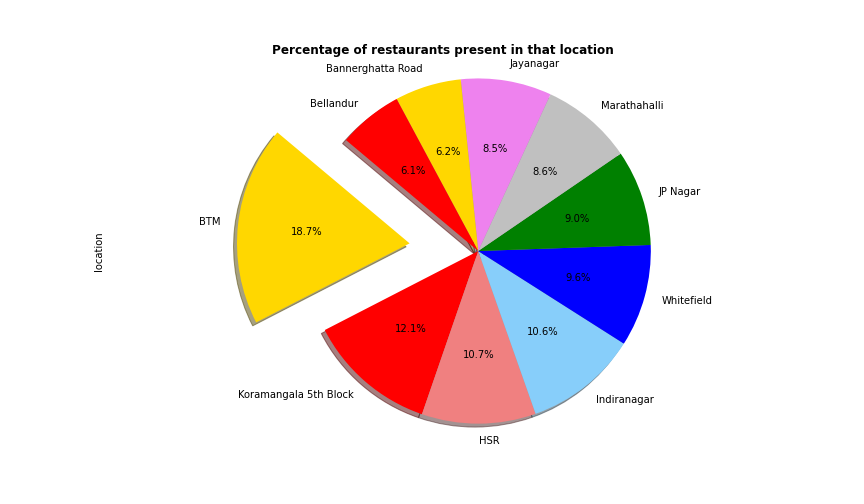

Text(0.5, 1.0, 'Percentage of restaurants present in that location')

In [220]:
plt.figure(figsize=(12,7))
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver','violet']
explode = (0.4, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice
ax=data.location.value_counts()[:10].plot(kind='pie',explode=explode,shadow=True,colors=colors,startangle=140,autopct='%1.1f%%')
plt.axis('equal')
plt.title("Percentage of restaurants present in that location", weight = 'bold')

RESTAURANTS TYPE AND COUNTS 

In [83]:
data['rest_type'].value_counts()

Quick Bites                   12127
Casual Dining                  8722
Cafe                           2982
Dessert Parlor                 1665
Delivery                       1490
                              ...  
Cafe, Food Court                  2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        1
Quick Bites, Kiosk                1
Bakery, Beverage Shop             1
Name: rest_type, Length: 88, dtype: int64

<IPython.core.display.Javascript object>


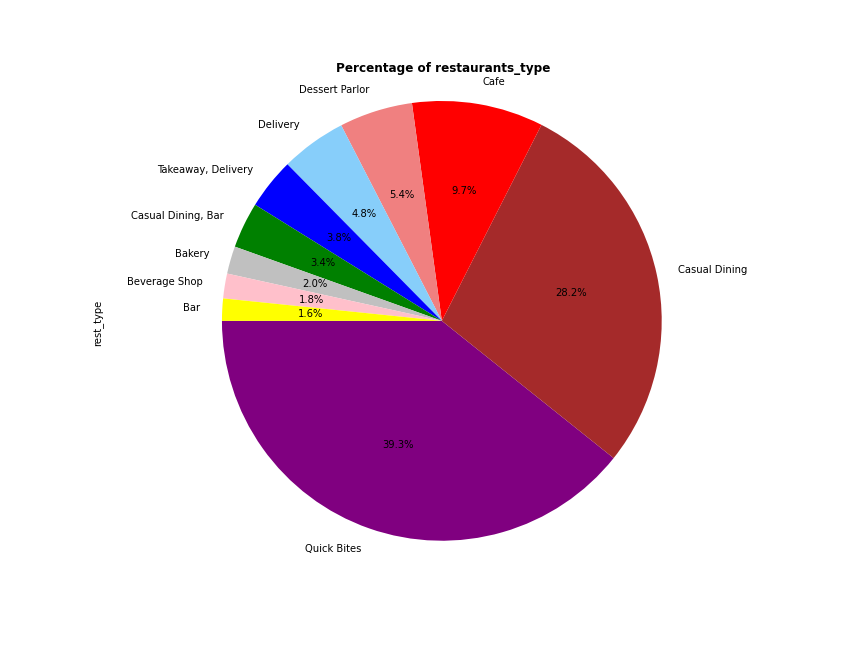

Text(0.5, 1.0, 'Percentage of restaurants_type')

In [189]:
plt.figure(figsize=(12,9))
colors = ['purple','brown', 'red', 'lightcoral', 'lightskyblue','blue','green','silver','pink','yellow']
ax=data.rest_type.value_counts()[:10].plot(kind='pie',colors=colors,startangle=180,autopct='%1.1f%%')
plt.axis('equal')
plt.title("Percentage of restaurants_type", weight = 'bold')

In [249]:
M=data['cost'].max()
m=data['cost'].min()
a=data['cost'].mean()
print('maxiumum cost is {0} , mimimum cost is {1} , average cost per two is {2}'.format((M),(m),(a)))

maxiumum cost is 6000.0 , mimimum cost is 40.0 , average cost per two is 612.8159066232356


Listed_type is visualized using treemap for better visual of counts and understadings

<IPython.core.display.Javascript object>


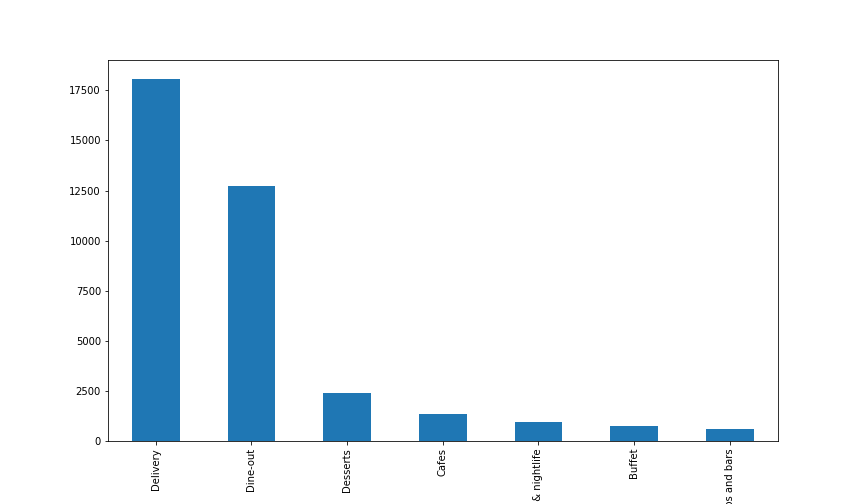

In [129]:
plt.figure(figsize=(12,7))
data.listed_type.value_counts().plot(kind='bar')
plt.show()

In [227]:
data['listed_type'].value_counts()

Delivery              18084
Dine-out              12729
Desserts               2382
Cafes                  1333
Drinks & nightlife      952
Buffet                  757
Pubs and bars           603
Name: listed_type, dtype: int64

<IPython.core.display.Javascript object>


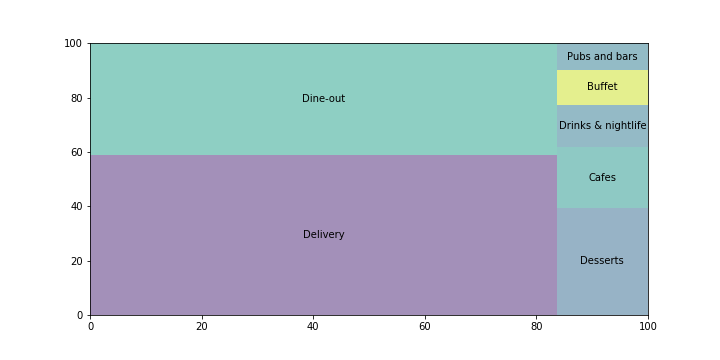

In [274]:
import squarify 
plt.figure(figsize=(10,5))
squarify.plot(sizes=data.listed_type.value_counts(),label=['Delivery',
'Dine-out',
'Desserts',     
'Cafes',  
'Drinks & nightlife',   
'Buffet',                  
'Pubs and bars'],alpha=0.5, norm_x=100)
plt.show()

<IPython.core.display.Javascript object>


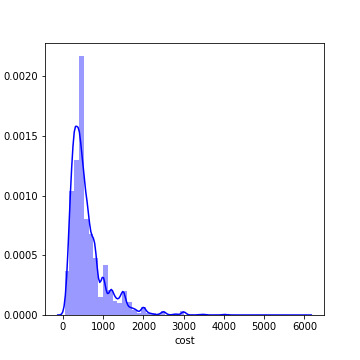

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [379]:
plt.figure(figsize=(5,5))
sns.distplot(fdata['cost'],color='blue')
plt.show()

lets check Normal distribution of our label(y)

<IPython.core.display.Javascript object>


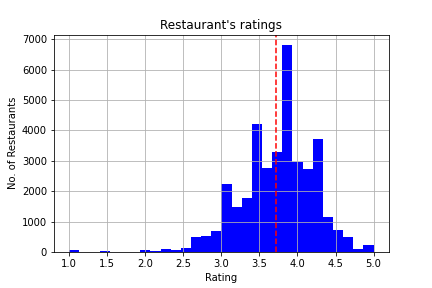

3.7208279044516828


In [75]:
data.rate.hist(color='b',bins=30)
plt.axvline(x=data.rate.mean(),color='red',ls='--')
plt.title("Restaurant's ratings")
plt.xlabel('Rating')
plt.ylabel('No. of Restaurants')
plt.show()
print(data.rate.mean())

Lets go into little good Insights

In [250]:
data['cost'].value_counts()

400.0     4734
300.0     4514
500.0     3664
600.0     2909
200.0     2732
          ... 
240.0        2
5000.0       1
70.0         1
3700.0       1
80.0         1
Name: cost, Length: 63, dtype: int64

<IPython.core.display.Javascript object>


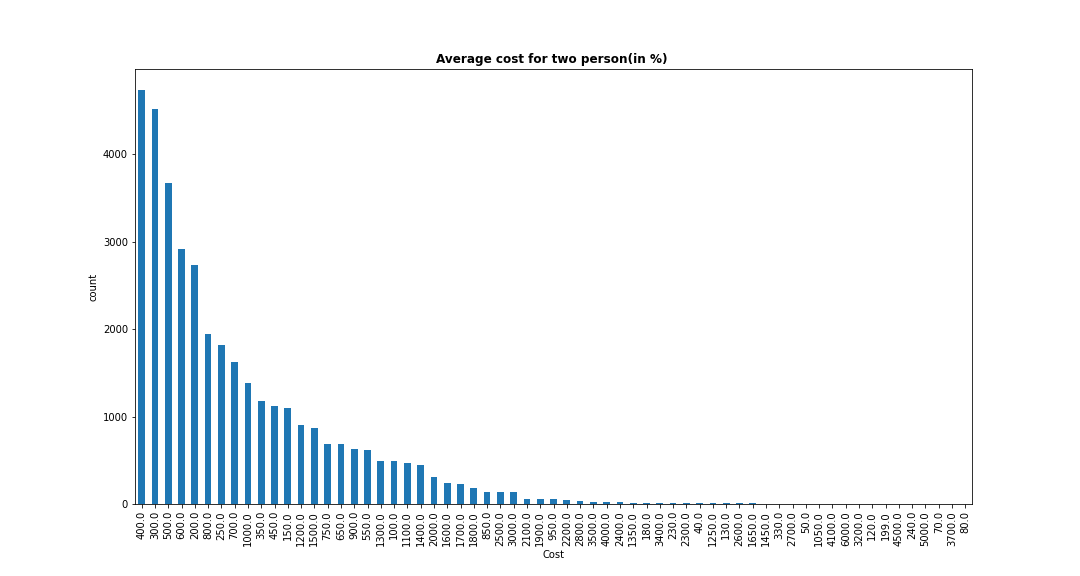

In [251]:
plt.figure(figsize=(15,8))
data['cost'].value_counts().plot(kind='bar')
plt.title('Average cost for two person(in %) ', weight='bold')
plt.xlabel('Cost')
plt.ylabel('count')
plt.show()
    
    



<IPython.core.display.Javascript object>


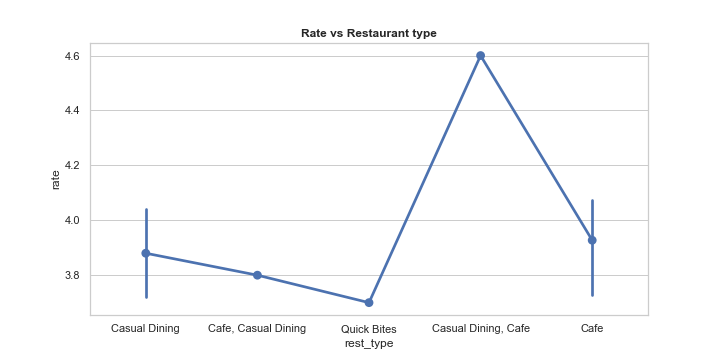

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [236]:
fig=plt.figure(figsize=(10,5))
sns.pointplot(data['rest_type'][:20], data['rate']).set_title('Rate vs Restaurant type',weight='bold')
sns.set_theme(style='darkgrid')
plt.show()

<IPython.core.display.Javascript object>


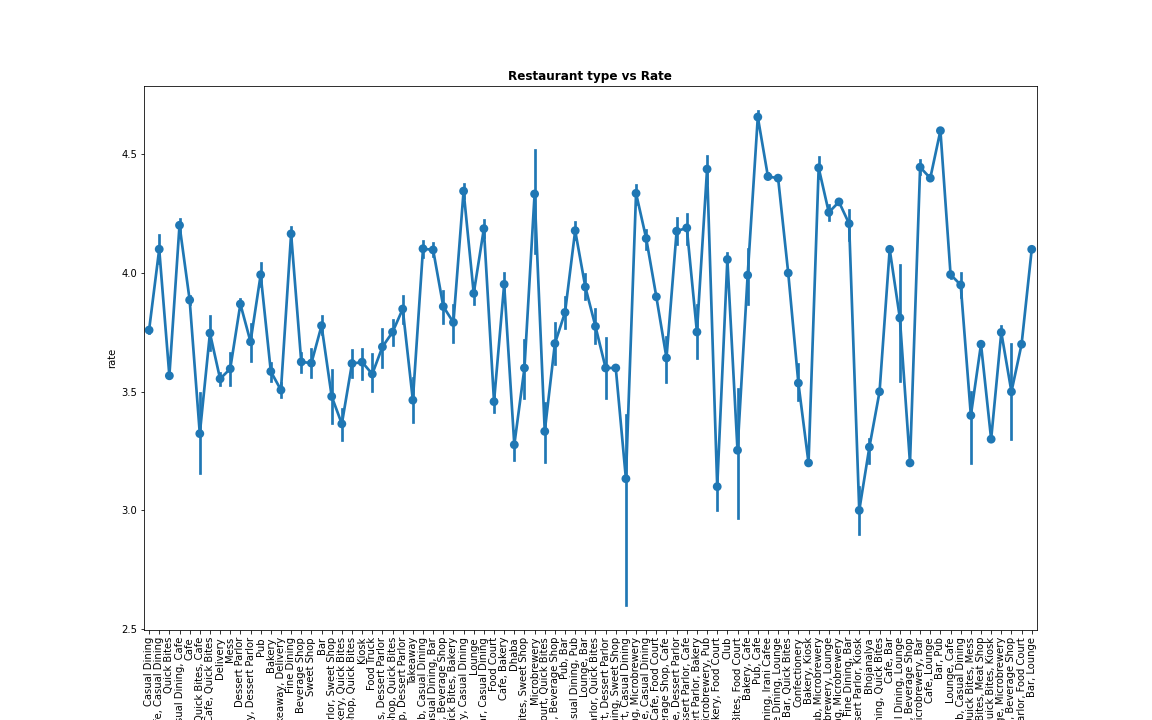

In [70]:
f,ax=plt.subplots(figsize=(16,10))
g=sns.pointplot(y='rate',x='rest_type',data=data)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.title('Restaurant type vs Rate', weight = 'bold')
plt.show()

Most favourite dishes in restaurants

<IPython.core.display.Javascript object>


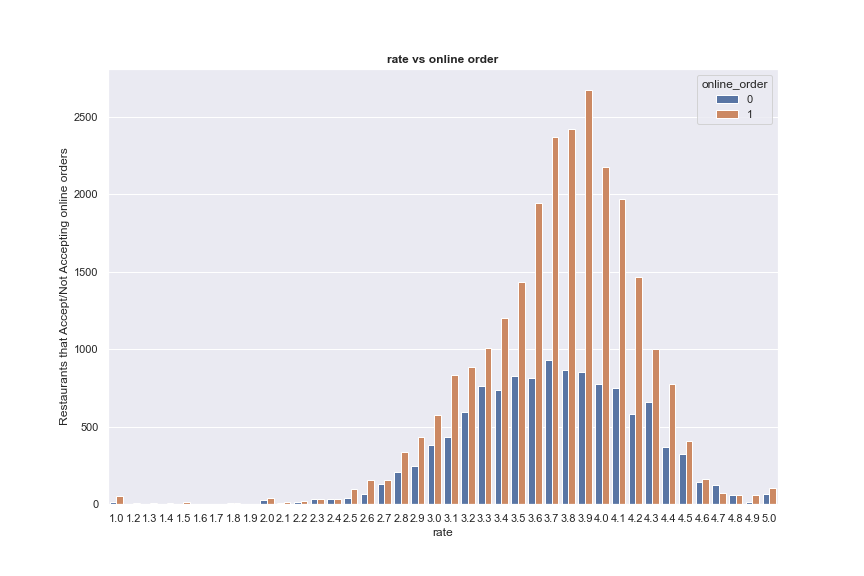

In [238]:
f,ax=plt.subplots(figsize=(12,8))
sns.countplot(x='rate',data=data,hue='online_order').set_title("rate vs online order",weight = 'bold')
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.show()

<IPython.core.display.Javascript object>


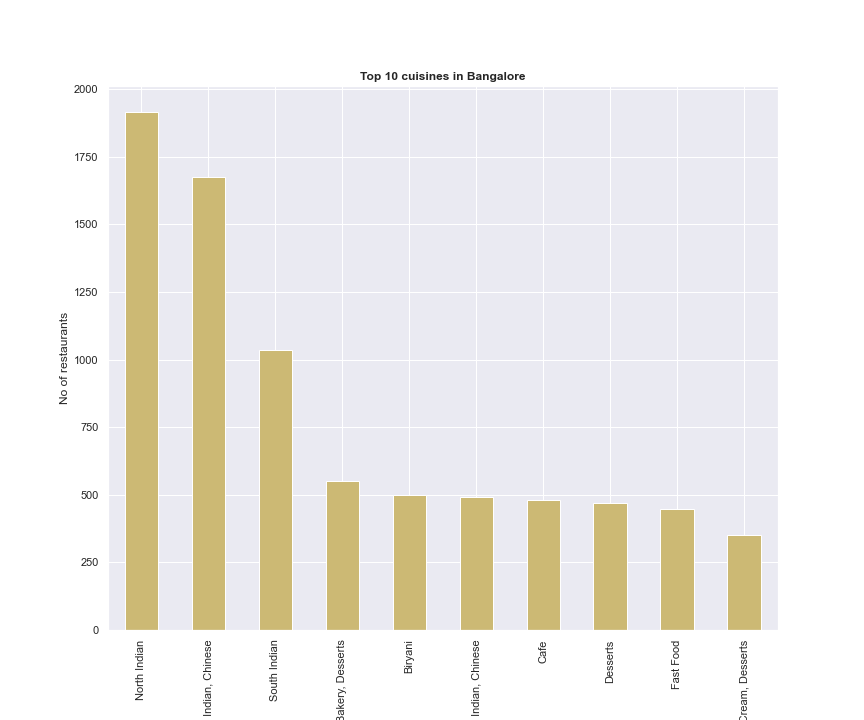

Text(0, 0.5, 'No of restaurants')

In [246]:
plt.figure(figsize=(12,10))
data.cuisines.value_counts()[:10].plot(kind='bar',color='y').set_title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

# Feature Engineering (One Hot Encoding & Label Encoding) 

LABEL ENCODING AND DROP UNREQUIRED COLUMNS FOR TRAINING

In [252]:
fdata=data.copy()

In [255]:
fdata.drop(['reviews_list','name'],axis=1,inplace=True)
fdata.drop(['dish_liked'],axis=1,inplace=True)
fdata.drop(['listed_type'],axis=1,inplace=True)

In [256]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
list1=['rest_type','location','cuisines','menu_item']
for i in list1:
    fdata[i]=LE.fit_transform(fdata[i])
fdata.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,4.1,775,1,25,1934,800.0,8519
1,1,0,4.1,787,1,25,831,800.0,8519
2,1,0,3.8,918,1,20,662,800.0,8519
3,0,0,3.7,88,1,74,2275,300.0,8519
4,0,0,3.8,166,4,25,1963,600.0,8519


In [257]:
fdata.sample(10)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
46233,1,0,4.0,182,86,74,1223,150.0,8519
48893,1,0,3.8,8,75,74,2302,500.0,8519
49477,0,0,3.3,8,6,63,2275,300.0,8519
1380,1,0,3.1,4,29,76,243,150.0,8519
44103,1,0,3.0,53,72,74,1133,300.0,7507
45948,1,0,3.7,19,27,25,1621,750.0,6544
10200,1,0,4.0,48,0,40,1060,300.0,8519
43742,0,0,3.8,263,27,25,782,650.0,8519
33114,1,0,2.3,0,0,37,1859,500.0,3175
51337,1,0,3.7,92,88,74,358,400.0,8519


WE JUST CHECK HOW BINARY ENCODING WORKS IN OUR DATASETS WE WONT USE FOR MODELS WE USING

ONE HOT ENCODING occupies more columns and gives more dimensionality acess use i go with "BINARY ENCODING" which is mixture of hash encoder and one hot coding which takes lesser columns (converts cat into ordinal first then convert to numerical which is also nominal one) and also we have different catagories in our features columns

In [258]:
set2=data.copy()

In [259]:
set2.drop(['reviews_list','name'],axis=1,inplace=True)
set2.drop(['dish_liked'],axis=1,inplace=True)
set2.drop(['listed_type'],axis=1,inplace=True)

In [260]:
set2

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[]
1,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[]
2,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,[]
3,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,[]
4,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,[]
...,...,...,...,...,...,...,...,...,...
51709,0,0,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,[]
51711,0,0,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,[]
51712,0,0,3.6,27,Whitefield,Bar,Continental,1500.0,[]
51715,0,1,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,[]


BINARY ENCODING 

In [102]:
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols =['location'])
#transforming the column after fitting
one= encoder.fit_transform(set2['location'])
#concating
set2 = pd.concat([set2,one], axis = 1)

c:\users\welcome\appdata\local\programs\python\python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
encoder = BinaryEncoder(cols =['rest_type'])
two= encoder.fit_transform(set2['rest_type'])
set2 = pd.concat([set2,two], axis = 1)

In [ ]:
encoder = BinaryEncoder(cols =['cuisines'])
three= encoder.fit_transform(set2['cuisines'])
set2 = pd.concat([set2,three], axis = 1)

In [ ]:
encoder = BinaryEncoder(cols =['menu_item'])
three= encoder.fit_transform(set2['menu_item'])
set2 = pd.concat([set2,three], axis = 1)

In [106]:
set2.drop(['location','rest_type','cuisines'],inplace=True,axis=1)
set2.drop(['menu_item'],inplace=True,axis=1)

In [107]:
set2.sample(10)

,online_order,book_table,rate,votes,cost(two),location_0,location_1,location_2,location_3,location_4,...,menu_item_5,menu_item_6,menu_item_7,menu_item_8,menu_item_9,menu_item_10,menu_item_11,menu_item_12,menu_item_13,menu_item_14
49584,0,0,3.2,4,300.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
35950,1,0,3.4,212,800.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
14573,0,0,3.4,9,1000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
20186,1,0,3.7,20,300.0,0,0,0,0,1,...,0,0,1,0,1,1,0,1,0,1
40021,0,0,3.3,5,300.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
21109,1,0,3.5,80,750.0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,1,0
30255,1,0,4.0,62,400.0,0,0,1,1,0,...,0,0,1,0,1,1,0,0,0,0
31106,1,1,4.1,222,600.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
31514,1,0,3.7,434,400.0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
25,0,0,3.2,11,600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Data transformation and Features Scaling

WE USING LABEL ENCODED FEATURES FOR OUR MODEL BUILDING

In [108]:
fdata.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 4.5, 2.9, 3.5, 1. , 2.6, 3.4, 5. , 2.5, 2.7, 2. , 4.7,
       4.8, 1.8, 2.4, 2.2, 2.3, 4.9, 2.1, 1.5, 1.3, 1.4, 1.2, 1.6, 1.9,
       1.7])

In [109]:
set2.shape #using binary encoder

(36840, 49)

In [110]:
fdata.shape #using label encoder

(36840, 9)

In [262]:
Features=fdata.drop(['rate'],axis=1)
Features.shape

(36840, 8)

In [263]:
Features.dtypes

online_order      uint8
book_table        uint8
votes             int64
location          int64
rest_type         int64
cuisines          int64
cost            float64
menu_item         int64
dtype: object

In [117]:
fdata['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 4.5, 2.9, 3.5, 1. , 2.6, 3.4, 5. , 2.5, 2.7, 2. , 4.7,
       4.8, 1.8, 2.4, 2.2, 2.3, 4.9, 2.1, 1.5, 1.3, 1.4, 1.2, 1.6, 1.9,
       1.7])

In [118]:
label=fdata['rate'].values
label

array([4.1, 4.1, 3.8, ..., 3.6, 4.3, 3.4])

# Splitting Datasets

Splitting the datasets into train and test data to see how our model performs to untrained datas
train set = 80% and test set =20%

In [264]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Features,label,test_size=0.2,random_state=42)

In [265]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((29472, 8), (7368, 8), (29472,), (7368,))

# REGRESSION MODELS

# 1.linear regression

In [267]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR

LinearRegression()

In [268]:
LR.fit(X_train,y_train)

LinearRegression()

In [269]:
print(LR.score(X_train,y_train))
print(LR.score(X_test,y_test))
print('intercept =',LR.intercept_)
print('coefficient =',LR.coef_)

0.2521135044394476
0.2515723187214681
intercept = 3.583898325819177
coefficient = [ 8.31856587e-02  2.71053890e-01  1.38246552e-04  3.13409164e-04
 -1.29619650e-03 -1.88191812e-05  1.26518853e-04 -2.97407839e-06]


PREDICTION USING Linear Regression

In [270]:
YP=LR.predict(X_test)
YP

array([3.45913507, 4.0858756 , 3.73087141, ..., 3.63587878, 3.70983046,
       3.63199651])

In [271]:
from sklearn.metrics import r2_score
LR=r2_score(y_test,YP)*100
print("Accuracy score for LR:",LR)

Accuracy score for LR: 25.157231872146813


Prediction is not up to the mark in linear regression as it score is just 25% 

# 2. Random Forest Regressor

In [272]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF.fit(X_train,y_train)
RF_predict=RF.predict(X_test)

In [273]:
print(RF.score(X_train,y_train))
print(RF.score(X_test,y_test))

0.9261767288162932
0.8144841552801996


SAMPLE TESTING

In [274]:
new=pd.DataFrame({'a':[1],'b':[0], 'c':[918],'d':[1],'e':[20],'f':[662],'g':[800.0],'h':[8519]})
predicted=RF.predict(new)
predicted

array([3.80397837])

In [275]:
sample=pd.DataFrame({"Actual Rating":y_test,
             "Predicted Rating":np.round(RF_predict,2)})
sample

,Actual Rating,Predicted Rating
0,3.6,3.54
1,3.7,3.70
2,3.0,3.56
3,3.1,3.16
4,3.3,3.35
...,...,...
7363,4.0,3.98
7364,4.2,4.19
7365,3.6,3.44
7366,3.4,3.41


R^2 = (Y-Y^)^2 ------ (expected-predicted)^2

In [276]:
from sklearn.metrics import r2_score
RFr2=r2_score(y_test,RF_predict)*100
print("Accuracy score for RF:",RFr2)

Accuracy score for RF: 81.44841552801995


# 3.Support Vector Machine

In [284]:
from sklearn.svm import SVR
svr=SVR()
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',kernel='rbf', max_iter=-1, 
    shrinking=True, tol=0.001, verbose=False)
svr.fit(X_train,y_train)
print(svr.score(X_train,y_train)*100)
print(svr.score(X_test,y_test)*100)

29.902705412616992
29.49650664430893


In [285]:
svr_pred=svr.predict(X_test)
svr_pred

array([3.50575199, 3.98106212, 3.69328148, ..., 3.57530422, 3.69169073,
       3.69496848])

In [286]:
svr=r2_score(y_test,svr_pred)*100
print("Accuracy score for RF:",svr)

Accuracy score for RF: 29.49650664430893


Its look like SVM gives weak predictive model so dont worry we have many to go algorithms

# BayesinRidge

In [186]:
from sklearn import linear_model
BR = linear_model.BayesianRidge()
BR.fit(X_train,y_train)
BR.predict(X_test)

array([3.45918223, 4.08564941, 3.73114156, ..., 3.63627948, 3.71019456,
       3.63257374])

In [201]:
bayesin=BR.predict(X_test)

In [187]:
print(BR.score(X_train,y_train)*100)
print(BR.score(X_test,y_test)*100)

25.211206272755547
25.16044827622984


In [280]:
br=r2_score(y_test,bayesin)*100
print("Accuracy score for RF:",br)

Accuracy score for RF: 25.16044827622984


# ExtraTree Regressor

In [190]:
from sklearn.ensemble import  ExtraTreesRegressor
ETR=ExtraTreesRegressor(n_estimators = 150)
ETR.fit(X_train,y_train)
y_pd=ETR.predict(X_test)
y_pd

array([3.6       , 3.7       , 3.38266667, ..., 3.6       , 3.4       ,
       3.8       ])

In [193]:
ETR.score(X_test,y_test)

0.884357425150581

In [197]:
ETR

ExtraTreesRegressor(n_estimators=150)

In [199]:
EXR=r2_score(y_test,y_pd)*100
print("Accuracy score for RF:",EXR)

Accuracy score for RF: 88.43574251505811


ET Regressor is giving best than random forest as it is like same as random forest but it use whole training data set for trees and 
uses randomly split unlike random forest of optimal split and its an ensemble technique bootstrap(bagging)

In [367]:
sample=pd.DataFrame({"Actual Rating":y_test,
             "Predicted Rating":np.round(y_pd,2)})
sample.sample(5)

,Actual Rating,Predicted Rating
1159,4.2,4.20
6739,4.1,4.10
6594,4.0,4.00
5907,4.1,4.15
1735,3.0,3.23


In [374]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pd)))
rmse

0.1645051768851471

# Ridge Regression

In [200]:
from sklearn.linear_model import Ridge
rr=Ridge()
rr.fit(X_train,y_train)
print(rr.score(X_train,y_train))
print(rr.score(X_test,y_test))
rr_pred=rr.predict(X_test)
rr_score=r2_score(y_test,rr_pred)*100
print("Accuracy score for RidgeR :",rr_score)

0.25211349978892095
0.25157422442766253
Accuracy score for RidgeR : 25.157422442766254


# DATA MODELS ACCURACIES

In [361]:
Final_scores=pd.DataFrame({"Model Names":['Linear Reg','RandomForest Reg','Support Vector Reg','Bayesin Ridge','Extra tree Reg','Ridge Reg'],
            "Accuracy socre":[LR,RFr2,svr,br,EXR,rr_score]})
Final_scores

,Model Names,Accuracy socre
0,Linear Reg,25.157232
1,RandomForest Reg,81.448416
2,Support Vector Reg,29.496507
3,Bayesin Ridge,25.160448
4,Extra tree Reg,88.435743
5,Ridge Reg,25.157422


# Checking multicolinearity  and correlation factors 

In [354]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=fdata[['online_order','book_table','votes','location','rest_type','cuisines','cost','menu_item']]

vif= pd.DataFrame()
vif["features"] = X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       features       VIF
0  online_order  2.477520
1    book_table  2.045182
2         votes  1.436188
3      location  2.797498
4     rest_type  4.387384
5      cuisines  4.347343
6          cost  4.536188
7     menu_item  6.167805


<IPython.core.display.Javascript object>


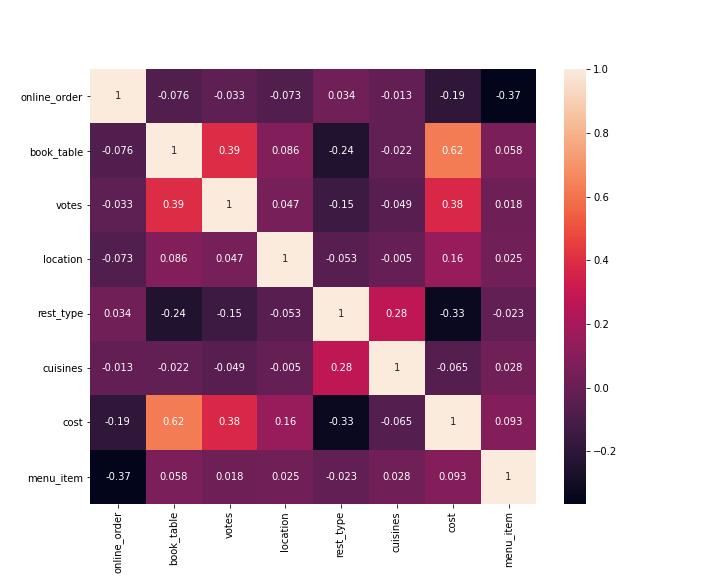

<AxesSubplot:>

In [296]:
corr=Features.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True)

# Saving Models 

Saving best model in pickle to use for further prediction

In [356]:
import pickle as pkl

In [358]:
with open('RFmodel','wb') as file:
    pkl.dump(RF,file)

In [359]:
with open('ETRmodel','wb') as file:
    pkl.dump(ETR,file)

In [364]:
Final_scores.to_csv("Models Prediction Scores.csv",index=False)